In [1]:
import cartopy.crs as ccrs
import cartopy
from cartopy import feature as cf
import xarray as xr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import metpy

In [10]:
import metpy.calc as mpcals
from metpy.units import units

In [19]:
single_level= xr.open_dataset("SingleLevel.nc")
multi_level= xr.open_dataset("MultiLevel.nc")

In [20]:
multi_level

<xarray.Dataset>
Dimensions:    (longitude: 149, latitude: 133, level: 5, time: 72)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 18.5 18.75 19.0
  * latitude   (latitude) float32 78.0 77.75 77.5 77.25 ... 45.5 45.25 45.0
  * level      (level) int32 200 500 700 850 1000
  * time       (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:00:00
Data variables:
    cc         (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    ciwc       (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    crwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:31:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

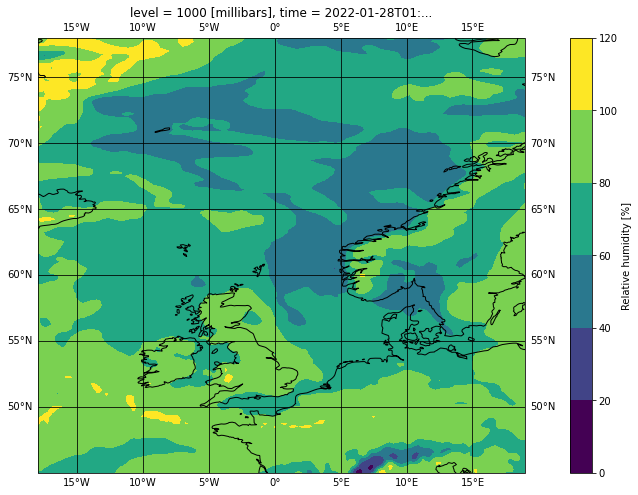

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
#plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, color='black')
#single_level.msl[i,:,:].plot.contour()
multi_level.r[1,4,:,:].plot.contourf()
#plt.savefig(f'tt{i}.png')

In [22]:
multi_level['mix_ratio_1000'] = mpcals.mixing_ratio_from_relative_humidity(1000* units.hPa, multi_level.t[:,4,:,:], multi_level.r[:,4,:,:])

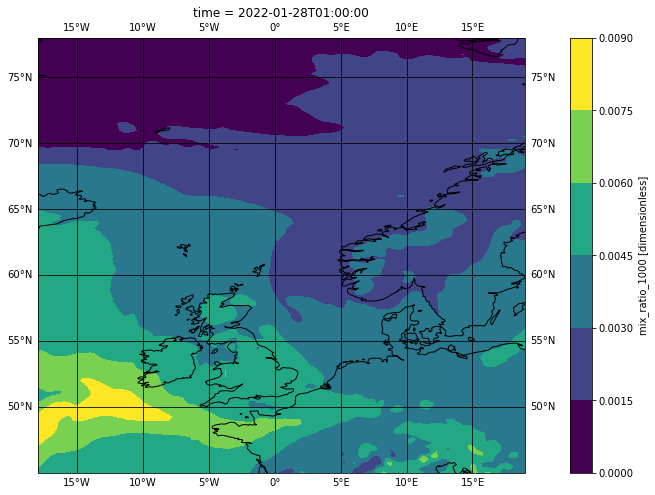

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
#plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, color='black')
#single_level.msl[i,:,:].plot.contour()
multi_level.mix_ratio_1000[1,:,:].plot.contourf()
#plt.savefig(f'tt{i}.png')

In [25]:
multi_level['mix_ratio_1000_1'] = multi_level.mix_ratio_1000 * 10**3

In [17]:
multi_level['mix_ratio_1000_1'] = multi_level.mix_ratio_1000_1 * 10

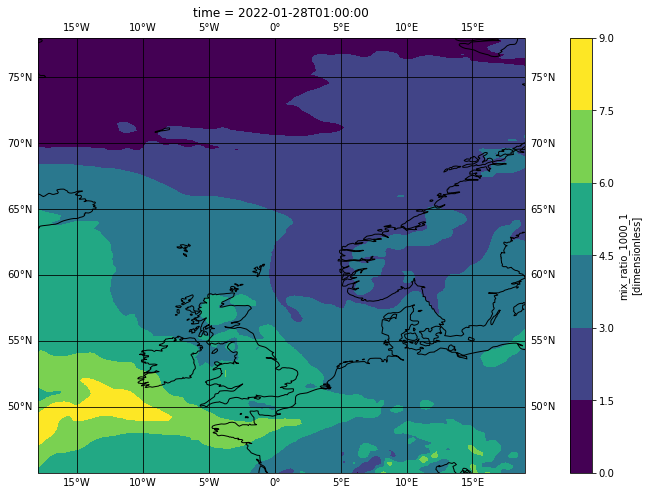

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
#plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, color='black')
#single_level.msl[i,:,:].plot.contour()
multi_level.mix_ratio_1000_1[1,:,:].plot.contourf()
#plt.savefig(f'tt{i}.png')

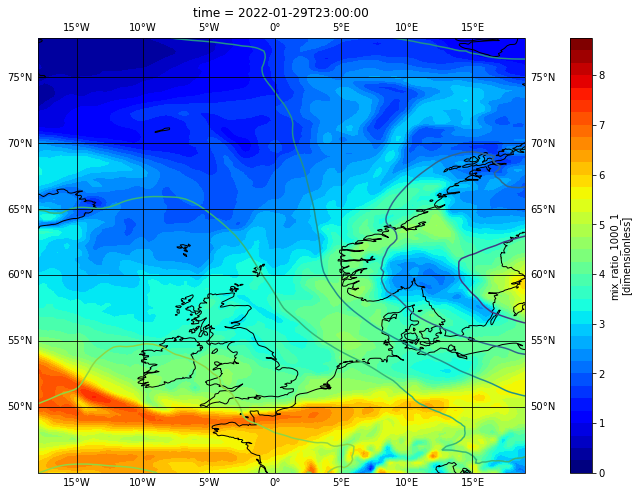

In [28]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.msl[i,:,:].plot.contour()
    multi_level.mix_ratio_1000_1[i,:,:].plot.contourf(levels=np.arange(0, 9, 0.25), cmap='jet')
    plt.savefig(f'mix_ratio{i}.png')

In [29]:
multi_level['vapour_pressure_1000'] = mpcals.vapor_pressure(1000* units.hPa, multi_level.mix_ratio_1000[:,:,:])

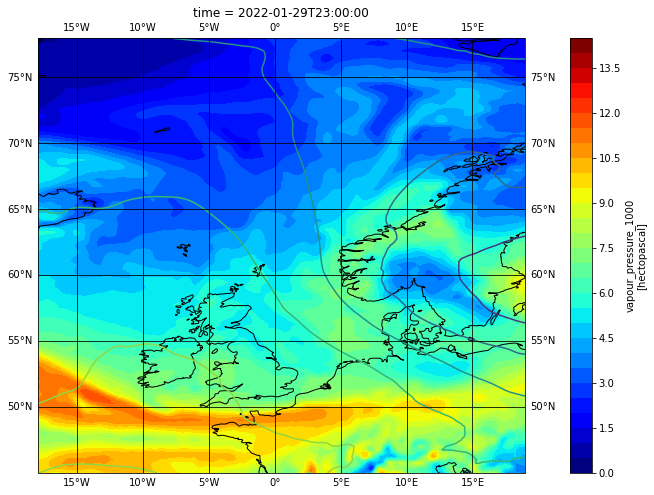

In [32]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.msl[i,:,:].plot.contour()
    multi_level.vapour_pressure_1000[i,:,:].plot.contourf(levels=np.arange(0, 15, 0.5), cmap='jet')
    plt.savefig(f'vap_pres{i}.png')